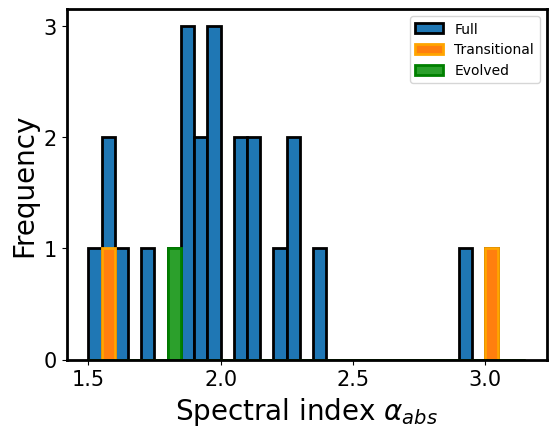

Sources            SpT    log(T_{star}/K)    Distance             log frac{l_{\star}}{L_{\odot}}    Stellar mass (M_{\star})
-----------------  -----  -----------------  -------------------  --------------------------------  --------------------------
J15354856-2958551  M4     3.51\pm0.02        87.84(-1.05,+1.07)   -1.035(0.046,-0.046)              0.27(0.13,-0.1)
J15514032-2146103  M4     3.51\pm0.02        140.84(-0.79,+0.8)   -1.335(0.096,-0.096)              0.27(0.13,-0.1)
J15521088-2125372  M4     3.51\pm0.02        154.94(-5.02,+5.36)  -1.752(0.117,-0.117)              0.27(0.13,-0.1)
J15530132-2114135  M4     3.51\pm0.02        143.04(-1.05,+1.06)  -1.212(0.099,-0.099)              0.27(0.13,-0.1)
J15534211-2049282  M3.5   3.52\pm0.02        145.0(-20.0,+20.0)   -0.84(0.14,-0.14)                 0.33(0.16,-0.12)
J15551704-2322165  M2.5   3.54\pm0.02        145.0(-20.0,+20.0)   -0.54(0.15,-0.15)                 0.49(0.18,-0.16)
J15554883-2512240  G3     3.77\pm0.01        143.5

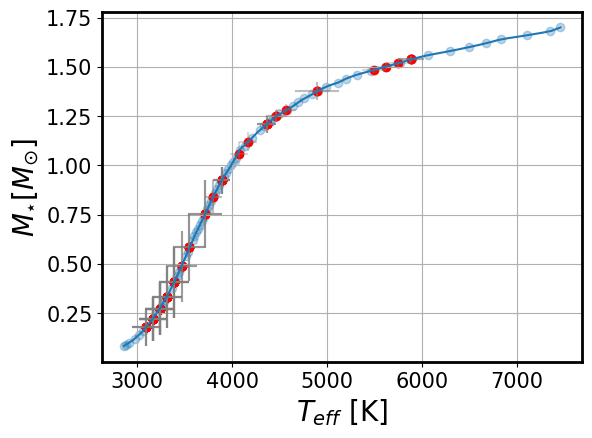

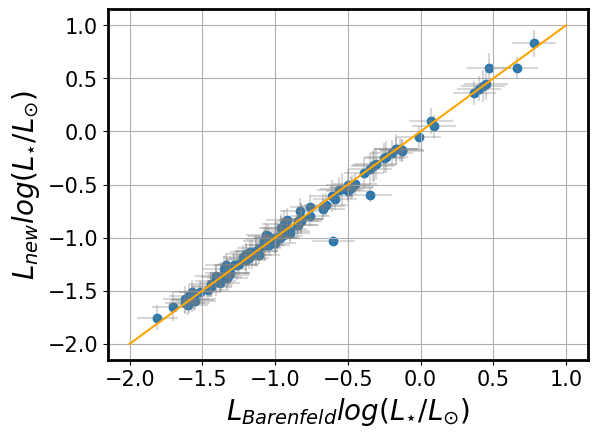

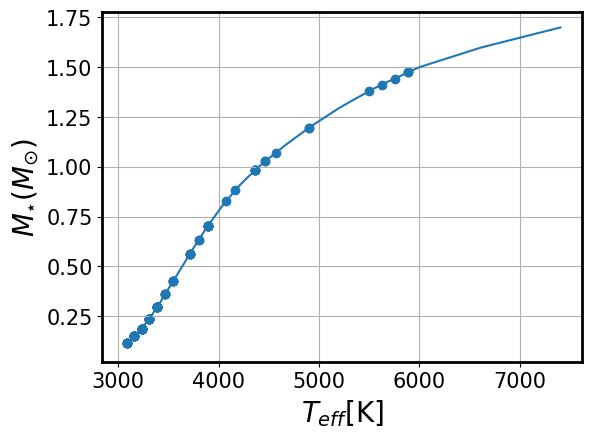

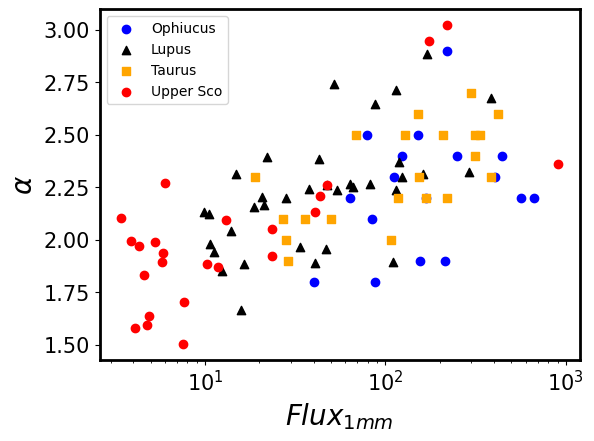

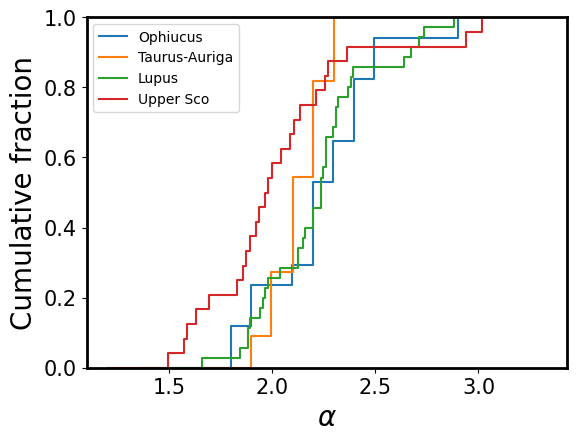

Upper_sco, Ophiucus KstestResult(statistic=0.45588235294117646, pvalue=0.021597017427386647)
Upper_sco, Taurus KstestResult(statistic=0.5357142857142857, pvalue=0.0017269211993544886)
Upper_sco, Lupus KstestResult(statistic=0.4226190476190476, pvalue=0.00819236989204072)
Upper_sco, Together KstestResult(statistic=0.4349315068493151, pvalue=0.0013364799317200726)


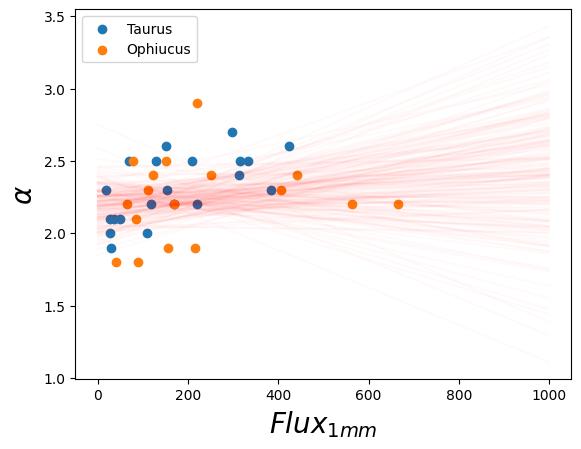

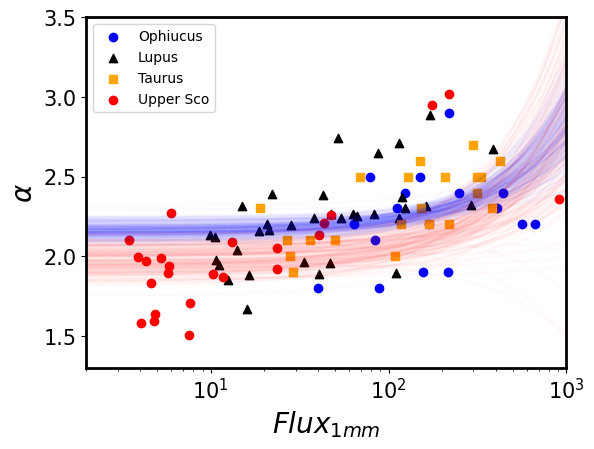

In [1]:
from linmix import linmix
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, ks_2samp
import random

from data_file import flux_list_2_87mm_garrett, ricci_ophiuchi_flux_3_3mm
from Cumulative_spectral_indices import flux_list_ophiucus_ricci_1mm, spectral_index_ophiucus, ricci_taurus_fluxes_1mm, spectral_indices_taurus, flux_barenfeld_0_88mm_updated, spectral_index_upper_sco, flux_lupus_1_mm, tazzari_lupus_spectral_indices, matching_fluxes_ricci_ophiucus_3MM_1mm, matching_fluxes_ricci_ophiucus_3mm_1MM, tazzari_lupus_flux

xsig = [0.2] * 99
ysig = [0.2] * 99

log_flux_barenfeld_0_88mm_updated = [np.log10(x) for x in flux_barenfeld_0_88mm_updated]
log_ricci_taurus_fluxes_1mm = [np.log10(x) for x in ricci_taurus_fluxes_1mm]
log_flux_list_ophiucus_ricci_1mm = [np.log10(x) for x in flux_list_ophiucus_ricci_1mm]
log_flux_lupus_1_mm = [np.log10(x) for x in flux_lupus_1_mm]

In [2]:
class region_data():
    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)

lupus_data = region_data()
taurus_data = region_data()
ophiucus_data = region_data()
upper_sco_data = region_data()
total_sample_data = region_data()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


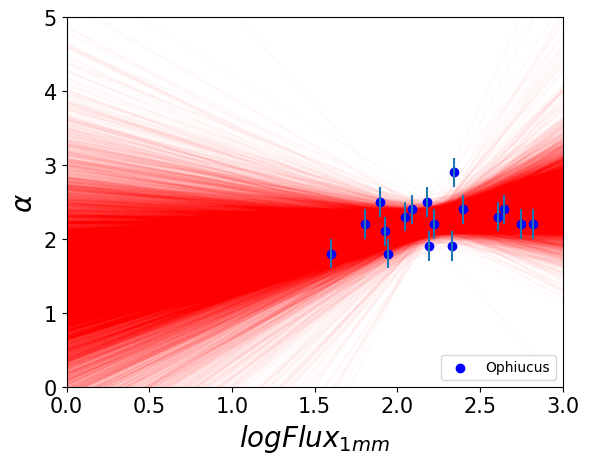

In [3]:
fig, ax = plt.subplots()

lm = linmix.LinMix(log_flux_list_ophiucus_ricci_1mm, spectral_index_ophiucus, xsig[:len(flux_list_ophiucus_ricci_1mm)], ysig[:len(flux_list_ophiucus_ricci_1mm)], K=2)
lm.run_mcmc(silent=True)

ophiucus_slope_flux_alpha = []
ophiucus_y_intercept_flux_alpha = []
ophiucus_scatter = []

xmin = 0
xmax = 800
xs = np.arange(xmin,xmax)
for i in range(0, 10000):
    ys = lm.chain[i]['alpha'] + xs * lm.chain[i]['beta']
    plt.plot(xs, ys, color='r', alpha=0.02, zorder=0)
    ophiucus_slope_flux_alpha.append(lm.chain[i]['beta'])
    ophiucus_y_intercept_flux_alpha.append(lm.chain[i]['alpha'])
    ophiucus_scatter.append(lm.chain[i]['sigsqr'])

plt.scatter(log_flux_list_ophiucus_ricci_1mm, spectral_index_ophiucus, label='Ophiucus', color='b', zorder=1)
plt.errorbar(log_flux_list_ophiucus_ricci_1mm, spectral_index_ophiucus, yerr=ysig[:len(flux_list_ophiucus_ricci_1mm)], ls='none', zorder=1)


plt.xlabel('$log Flux_{1mm}$', fontsize=20), plt.ylabel(r'$\alpha$', fontsize=20)
plt.legend()
plt.xlim(0,3)
plt.ylim(0,5)
ax.tick_params(which='both', labelsize=15)
plt.show()

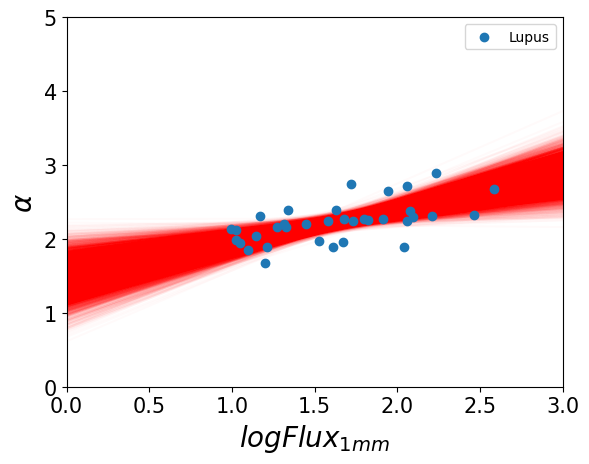

In [4]:
fig, ax = plt.subplots()

flux_lupus_1_mm = [np.log10(x) for x in flux_lupus_1_mm]
lm = linmix.LinMix(log_flux_lupus_1_mm, tazzari_lupus_spectral_indices, xsig[:len(flux_lupus_1_mm)], ysig[:len(flux_lupus_1_mm)], K=2)
lm.run_mcmc(silent=True)

lupus_slope_flux_alpha = []
lupus_y_intercept_flux_alpha = []
lupus_scatter = []

xs = np.arange(xmin, xmax)
for i in range(0, 10000):
    ys = lm.chain[i]['alpha'] + xs * lm.chain[i]['beta']
    plt.plot(xs, ys, color='r', alpha=0.02, zorder=0)
    lupus_slope_flux_alpha.append(lm.chain[i]['beta'])
    lupus_y_intercept_flux_alpha.append(lm.chain[i]['alpha'])
    lupus_scatter.append(lm.chain[i]['sigsqr'])


plt.scatter(log_flux_lupus_1_mm, tazzari_lupus_spectral_indices, label='Lupus', zorder=1)

plt.xlabel('$log Flux_{1mm}$', fontsize=20), plt.ylabel(r'$\alpha$', fontsize=20)
plt.legend()
plt.xlim(0,3)
plt.ylim(0,5)

ax.tick_params(which='both', labelsize=15)
plt.show()

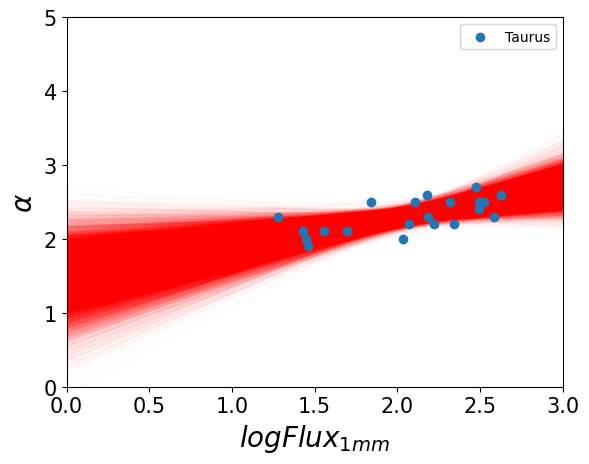

In [5]:
fig, ax = plt.subplots()

lm = linmix.LinMix(log_ricci_taurus_fluxes_1mm, spectral_indices_taurus, xsig[:len(ricci_taurus_fluxes_1mm)], ysig[:len(ricci_taurus_fluxes_1mm)], K=2)
lm.run_mcmc(silent=True)

taurus_slope_flux_alpha = []
taurus_y_intercept_flux_alpha = []
taurus_scatter =[]

xs = np.arange(xmin, xmax)
for i in range(0, 10000):
    ys = lm.chain[i]['alpha'] + xs * lm.chain[i]['beta']
    plt.plot(xs, ys, color='r', alpha=0.02, zorder=0)
    taurus_slope_flux_alpha.append(lm.chain[i]['beta'])
    taurus_y_intercept_flux_alpha.append(lm.chain[i]['alpha'])
    taurus_scatter.append(lm.chain[i]['sigsqr'])

plt.scatter(log_ricci_taurus_fluxes_1mm, spectral_indices_taurus, label='Taurus', zorder=1)

plt.xlabel('$log Flux_{1mm}$', fontsize=20), plt.ylabel(r'$\alpha$', fontsize=20)
plt.legend()
plt.xlim(0,3)
plt.ylim(0,5)
ax.tick_params(which='both', labelsize=15)
plt.show()

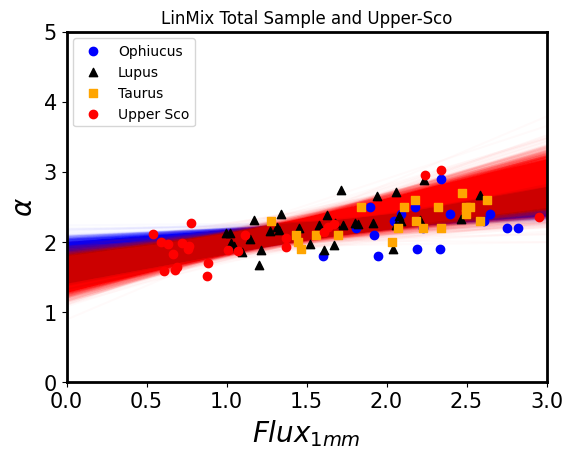

In [6]:
fig, ax = plt.subplots()

# set thickness axis
plt.setp(ax.spines.values(), linewidth=2)

# avoid axis labels being cut
plt.gcf().subplots_adjust(bottom=0.15, left=0.15)

log_total_fluxes = log_ricci_taurus_fluxes_1mm + log_flux_lupus_1_mm + log_flux_list_ophiucus_ricci_1mm
total_spectra_indices = spectral_indices_taurus + tazzari_lupus_spectral_indices + spectral_index_ophiucus

xsig = [0] * 100
ysig = [0] * 100
lm = linmix.LinMix(log_total_fluxes, total_spectra_indices, xsig[:len(log_total_fluxes)], ysig[:len(log_total_fluxes)], K=2)
lm.run_mcmc(silent=True)

total_sample_slope_flux_alpha = []
total_sample_y_intercept_flux_alpha = []
scatter_total_sample = []

xs = np.arange(0, 7)
for i in range(0, 10000):
    total_sample_slope_flux_alpha.append(lm.chain[i]['beta'])
    total_sample_y_intercept_flux_alpha.append(lm.chain[i]['alpha'])
    ys = lm.chain[i]['alpha'] + xs * lm.chain[i]['beta']
    plt.plot(xs, ys, color='b', alpha=0.02, zorder=0)
    scatter_total_sample.append(lm.chain[i]['sigsqr'])


lm = linmix.LinMix(log_flux_barenfeld_0_88mm_updated, spectral_index_upper_sco, xsig[:len(flux_barenfeld_0_88mm_updated)], ysig[:len(flux_barenfeld_0_88mm_updated)], K=2)
lm.run_mcmc(silent=True)

upper_sco_slope_flux_alpha = []
upper_sco_y_intercept_flux_alpha = []
scatter_upper_sco = []

xs = np.arange(0, 7)
for i in range(0, 10000):
    ys = lm.chain[i]['alpha'] + xs * lm.chain[i]['beta']
    plt.plot(xs, ys, color='r', alpha=0.02, zorder=0)
    upper_sco_slope_flux_alpha.append(lm.chain[i]['beta'])
    upper_sco_y_intercept_flux_alpha.append(lm.chain[i]['alpha'])
    scatter_upper_sco.append(lm.chain[i]['sigsqr'])

plt.scatter(log_flux_list_ophiucus_ricci_1mm, spectral_index_ophiucus, label='Ophiucus', color='blue', zorder=1)
plt.scatter(log_flux_lupus_1_mm, tazzari_lupus_spectral_indices, label='Lupus', marker='^', color='black', zorder=1)
plt.scatter(log_ricci_taurus_fluxes_1mm, spectral_indices_taurus, label='Taurus', marker='s', color='orange', zorder=1)
plt.scatter(log_flux_barenfeld_0_88mm_updated, spectral_index_upper_sco, label='Upper Sco', color='red', zorder=1)

plt.xlabel('$Flux_{1mm}$', fontsize=20), plt.ylabel(r'$\alpha$', fontsize=20)
plt.xlim(0,3)
plt.ylim(0,5)
plt.legend()
ax.tick_params(which='both', labelsize=15)
plt.title("LinMix Total Sample and Upper-Sco")
plt.savefig("LinMix Total Sample and Upper-Sco")
plt.show()

# Histograms

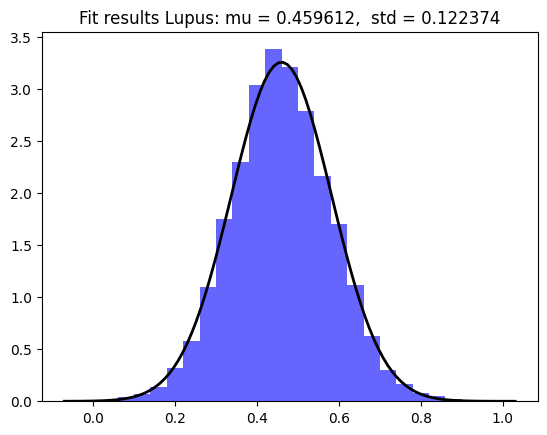

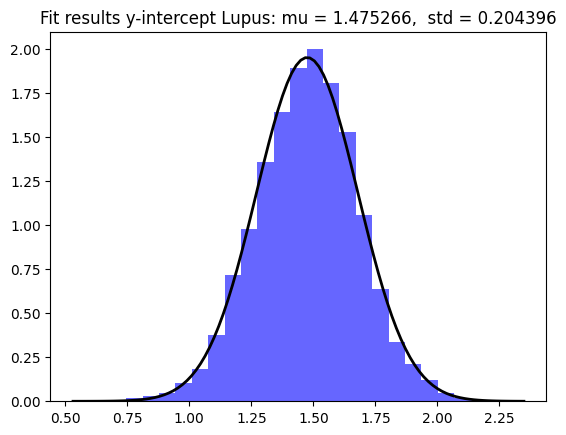

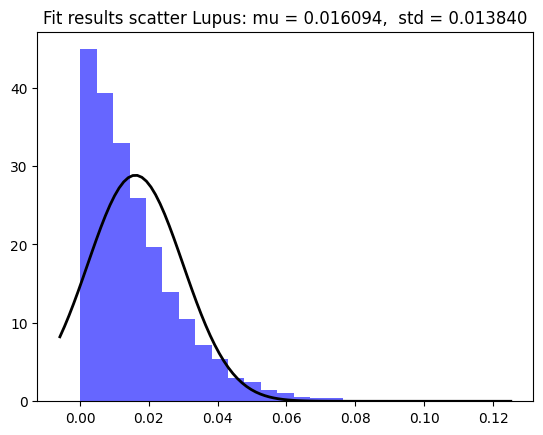

In [7]:
lupus_data.slope_mu, lupus_data.slope_std = norm.fit(lupus_slope_flux_alpha)
# Plot the histogram.
plt.hist(lupus_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, lupus_data.slope_mu, lupus_data.slope_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results Lupus: mu = %.6f,  std = %.6f" % (lupus_data.slope_mu, lupus_data.slope_std)
plt.title(title)
plt.show()

lupus_data.y_intercept_mu, lupus_data.y_intercept_std = norm.fit(lupus_y_intercept_flux_alpha)
# Plot the histogram.
plt.hist(lupus_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, lupus_data.y_intercept_mu, lupus_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results y-intercept Lupus: mu = %.6f,  std = %.6f" % (lupus_data.y_intercept_mu, lupus_data.y_intercept_std)
plt.title(title)
plt.show()

lupus_scatter_mu, lupus_scatter_std = norm.fit(lupus_scatter)
# Plot the histogram.
plt.hist(lupus_scatter, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, lupus_scatter_mu, lupus_scatter_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results scatter Lupus: mu = %.6f,  std = %.6f" % (lupus_scatter_mu, lupus_scatter_std)
plt.title(title)
plt.show()

### Ophiucus

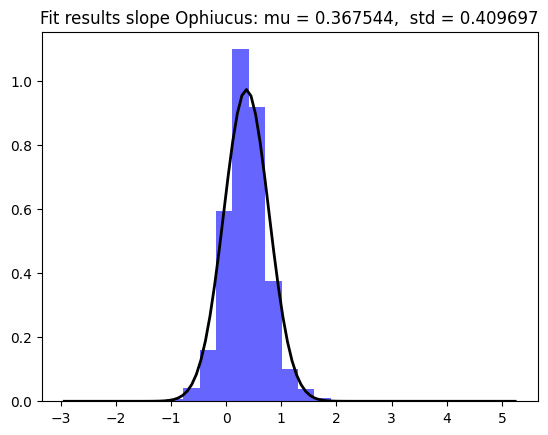

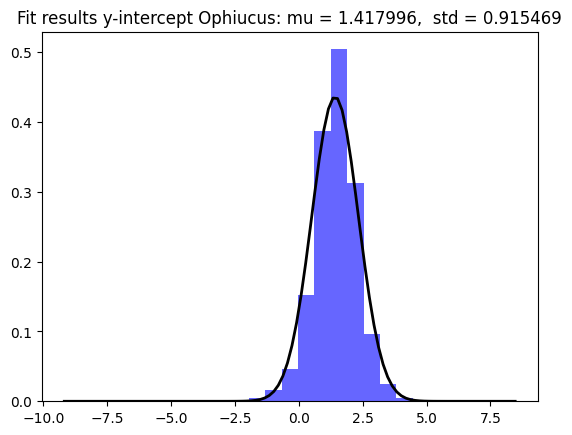

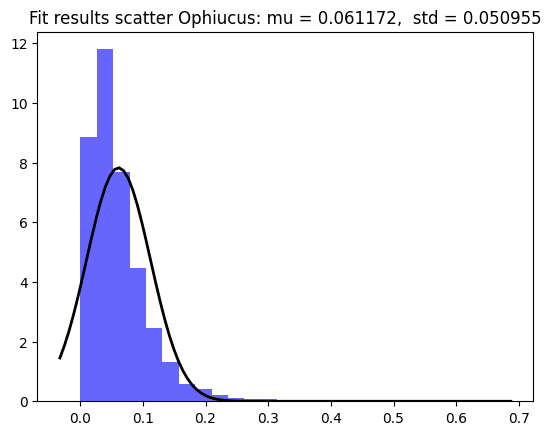

In [8]:
ophiucus_data.slope_mu, ophiucus_data.slope_std = norm.fit(ophiucus_slope_flux_alpha)
# Plot the histogram.
plt.hist(ophiucus_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, ophiucus_data.slope_mu, ophiucus_data.slope_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results slope Ophiucus: mu = %.6f,  std = %.6f" % (ophiucus_data.slope_mu, ophiucus_data.slope_std)
plt.title(title)
plt.show()

ophiucus_data.y_intercept_mu, ophiucus_data.y_intercept_std = norm.fit(ophiucus_y_intercept_flux_alpha)
# Plot the histogram.
plt.hist(ophiucus_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, ophiucus_data.y_intercept_mu, ophiucus_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results y-intercept Ophiucus: mu = %.6f,  std = %.6f" % (ophiucus_data.y_intercept_mu, ophiucus_data.y_intercept_std)
plt.title(title)
plt.show()

ophiucus_data.scatter_mu, ophiucus_data.scatter_std = norm.fit(ophiucus_scatter)
_std = norm.fit(ophiucus_scatter)
# Plot the histogram.
plt.hist(ophiucus_scatter, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, ophiucus_data.scatter_mu, ophiucus_data.scatter_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results scatter Ophiucus: mu = %.6f,  std = %.6f" % (ophiucus_data.scatter_mu, ophiucus_data.scatter_std)
plt.title(title)
plt.show()

### Taurus

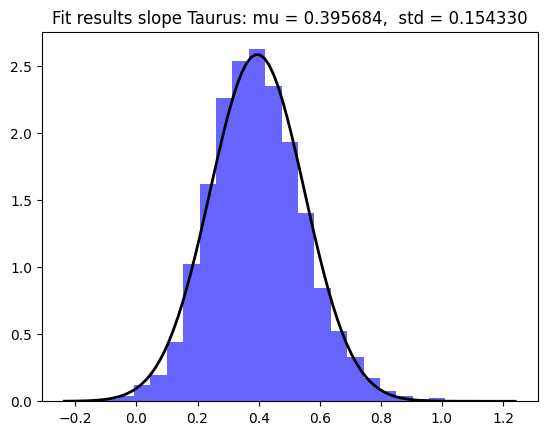

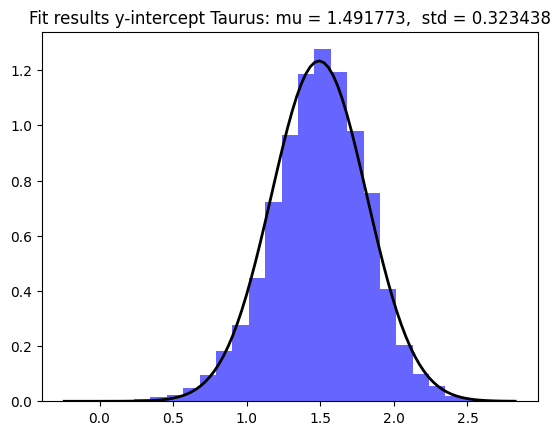

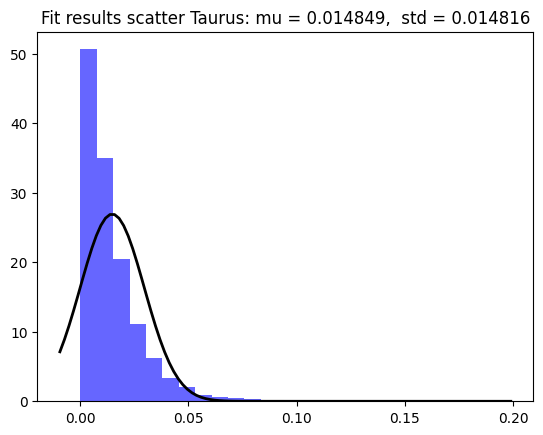

In [9]:
taurus_data.slope_mu, taurus_data.slope_std = norm.fit(taurus_slope_flux_alpha)
# Plot the histogram.
plt.hist(taurus_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, taurus_data.slope_mu, taurus_data.slope_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results slope Taurus: mu = %.6f,  std = %.6f" % (taurus_data.slope_mu, taurus_data.slope_std)
plt.title(title)
plt.show()

taurus_data.y_intercept_mu, taurus_data.y_intercept_std = norm.fit(taurus_y_intercept_flux_alpha)
# Plot the histogram.
plt.hist(taurus_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, taurus_data.y_intercept_mu, taurus_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results y-intercept Taurus: mu = %.6f,  std = %.6f" % (taurus_data.y_intercept_mu, taurus_data.y_intercept_std)
plt.title(title)
plt.show()

taurus_data.scatter_mu, taurus_data.scatter_std = norm.fit(taurus_scatter)
# Plot the histogram.
plt.hist(taurus_scatter, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, taurus_data.scatter_mu, taurus_data.scatter_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results scatter Taurus: mu = %.6f,  std = %.6f" % (taurus_data.scatter_mu, taurus_data.scatter_std)
plt.title(title)
plt.show()

### Total Sample

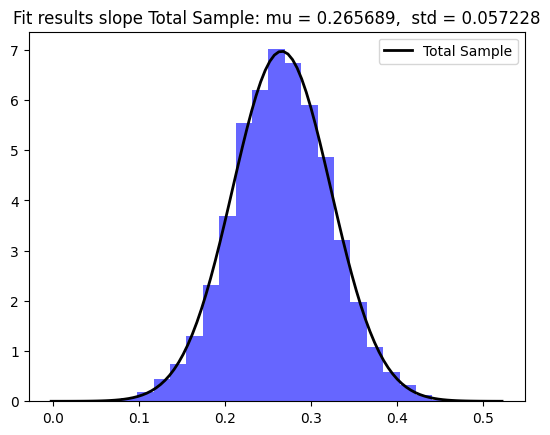

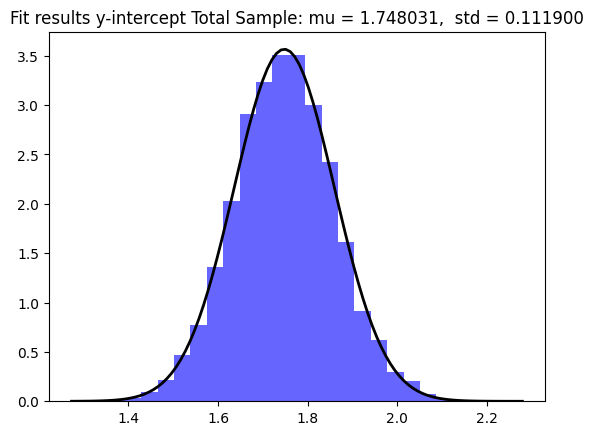

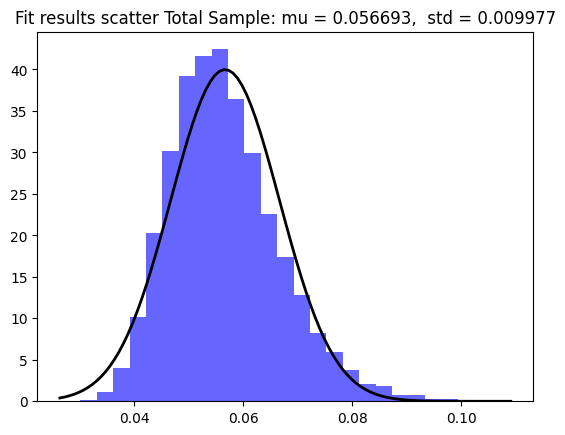

In [10]:
total_sample_data.slope_mu, total_sample_data.slope_std = norm.fit(total_sample_slope_flux_alpha)
# Plot the histogram.
plt.hist(total_sample_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, total_sample_data.slope_mu, total_sample_data.slope_std)
plt.plot(x, p, 'k', linewidth=2, label="Total Sample")
title = "Fit results slope Total Sample: mu = %.6f,  std = %.6f" % (total_sample_data.slope_mu, total_sample_data.slope_std)
plt.title(title)
plt.legend()
plt.show()

total_sample_data.y_intercept_mu, total_sample_data.y_intercept_std = norm.fit(total_sample_y_intercept_flux_alpha)
# Plot the histogram.
plt.hist(total_sample_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, total_sample_data.y_intercept_mu, total_sample_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results y-intercept Total Sample: mu = %.6f,  std = %.6f" % (total_sample_data.y_intercept_mu, total_sample_data.y_intercept_std)
plt.title(title)
plt.show()

total_sample_data.scatter_mu, total_sample_data.scatter_std = norm.fit(scatter_total_sample)
# Plot the histogram.
plt.hist(scatter_total_sample, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, total_sample_data.scatter_mu, total_sample_data.scatter_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results scatter Total Sample: mu = %.6f,  std = %.6f" % (total_sample_data.scatter_mu, total_sample_data.scatter_std)
plt.title(title)
plt.show()

### Upper-Sco

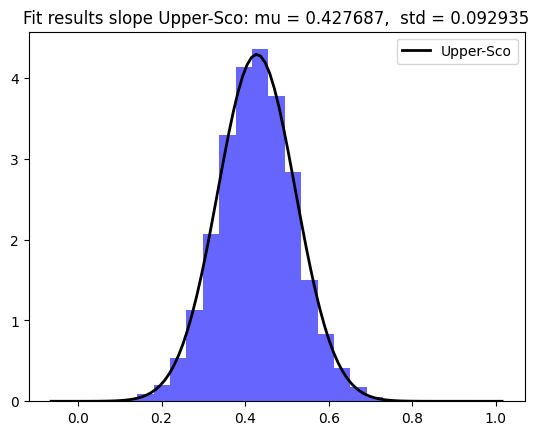

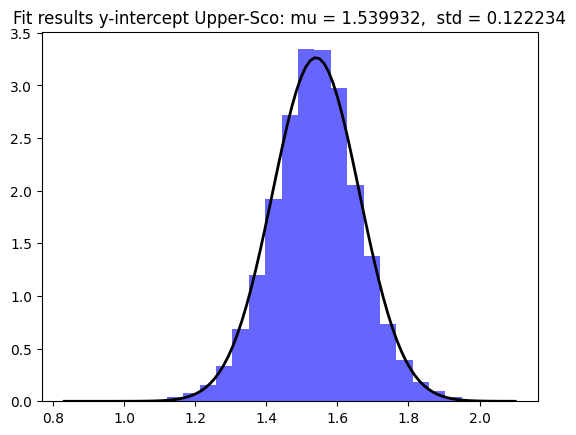

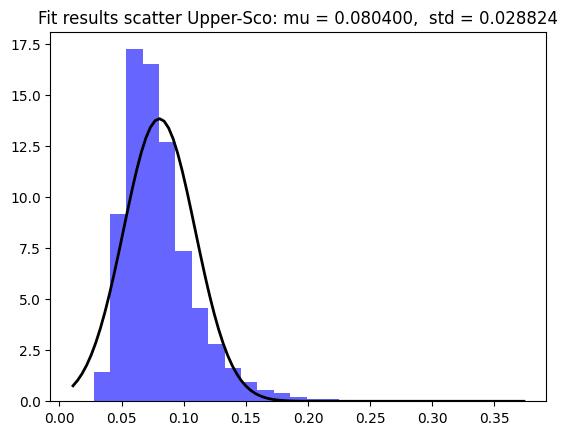

In [11]:
upper_sco_data.slope_mu, upper_sco_data.slope_std = norm.fit(upper_sco_slope_flux_alpha)
# Plot the histogram.
plt.hist(upper_sco_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, upper_sco_data.slope_mu, upper_sco_data.slope_std)
plt.plot(x, p, 'k', linewidth=2, label="Upper-Sco")
title = "Fit results slope Upper-Sco: mu = %.6f,  std = %.6f" % (upper_sco_data.slope_mu, upper_sco_data.slope_std)
plt.title(title)
plt.legend()
plt.show()

upper_sco_data.y_intercept_mu, upper_sco_data.y_intercept_std = norm.fit(upper_sco_y_intercept_flux_alpha)
# Plot the histogram.
plt.hist(upper_sco_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, upper_sco_data.y_intercept_mu, upper_sco_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results y-intercept Upper-Sco: mu = %.6f,  std = %.6f" % (upper_sco_data.y_intercept_mu, upper_sco_data.y_intercept_std)
plt.title(title)
plt.show()

upper_sco_data.scatter_mu, upper_sco_data.scatter_std = norm.fit(scatter_upper_sco)
# Plot the histogram.
plt.hist(scatter_upper_sco, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, upper_sco_data.scatter_mu, upper_sco_data.scatter_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results scatter Upper-Sco: mu = %.6f,  std = %.6f" % (upper_sco_data.scatter_mu, upper_sco_data.scatter_std)
plt.title(title)
plt.show()

In [12]:
print(u"Lupus slope mean: %.5f \u00B1 %.5f "
      "\nOphiucus slope mean: %.5f \u00B1 %.5f"
      "\nTaurus slope mean: %.5f \u00B1 %.5f"
      "\nTotal Sample slope mean: %.5f \u00B1 %.5f"
      "\nUpper-Sco slope mean: %.5f \u00B1 %.5f"
      % (lupus_data.slope_mu, lupus_data.slope_std,
         ophiucus_data.slope_mu,ophiucus_data.slope_std,
         taurus_data.slope_mu, taurus_data.slope_std,
         total_sample_data.slope_mu, total_sample_data.slope_std,
         upper_sco_data.slope_mu, upper_sco_data.slope_std))

Lupus slope mean: 0.45961 ± 0.12237 
Ophiucus slope mean: 0.36754 ± 0.40970
Taurus slope mean: 0.39568 ± 0.15433
Total Sample slope mean: 0.26569 ± 0.05723
Upper-Sco slope mean: 0.42769 ± 0.09294


In [13]:
print(u"Lupus y-intercept mean: %.5f \u00B1 %.5f"
      "\nOphiucus y-intercept mean: %.5f \u00B1 %.5f"
      "\nTaurus y-intercept mean: %.5f\u00B1 %.5f"
      "\nTotal Sample y-intercept mean: %.5f \u00B1 %.5f"
      "\nUpper-Sco y-intercept mean: %.5f \u00B1 %.5f"
      % (lupus_data.y_intercept_mu, lupus_data.y_intercept_std,
         ophiucus_data.y_intercept_mu, ophiucus_data.y_intercept_std,
         taurus_data.y_intercept_mu, taurus_data.y_intercept_std,
         total_sample_data.y_intercept_mu, total_sample_data.y_intercept_std,
         upper_sco_data.y_intercept_mu, upper_sco_data.y_intercept_std))

Lupus y-intercept mean: 1.47527 ± 0.20440
Ophiucus y-intercept mean: 1.41800 ± 0.91547
Taurus y-intercept mean: 1.49177± 0.32344
Total Sample y-intercept mean: 1.74803 ± 0.11190
Upper-Sco y-intercept mean: 1.53993 ± 0.12223


In [14]:
print(u"Lupus scatter mean: %.5f \u00B1 %.5f "
      "\nOphiucus scatter mean: %.5f \u00B1 %.5f"
      "\nTaurus scatter mean: %.5f \u00B1 %.5f"
      "\nTotal scatter slope mean: %.5f \u00B1 %.5f"
      "\nUpper-Sco scatter mean: %.5f \u00B1 %.5f"
      % (lupus_scatter_mu, lupus_scatter_std,
         ophiucus_data.scatter_mu, ophiucus_data.scatter_std,
         taurus_data.scatter_mu, taurus_data.scatter_std,
         total_sample_data.scatter_mu, total_sample_data.scatter_std,
         upper_sco_data.scatter_mu, upper_sco_data.scatter_std))

Lupus scatter mean: 0.01609 ± 0.01384 
Ophiucus scatter mean: 0.06117 ± 0.05096
Taurus scatter mean: 0.01485 ± 0.01482
Total scatter slope mean: 0.05669 ± 0.00998
Upper-Sco scatter mean: 0.08040 ± 0.02882


In [15]:
from tabulate import tabulate
first_row = ["Region", "Slope mean", "Slope std", "Y-Intercept mean", "Y-Intercept std", "scatter mean", "scatter std"]
table = [["Upper-Sco", upper_sco_data.slope_mu, upper_sco_data.slope_std, upper_sco_data.y_intercept_mu, upper_sco_data.y_intercept_std, upper_sco_data.scatter_mu, upper_sco_data.scatter_std],
         ["Lupus", lupus_data.slope_mu, lupus_data.slope_std, lupus_data.y_intercept_mu, lupus_data.y_intercept_std, lupus_scatter_mu, lupus_scatter_std],
         ["Taurus", taurus_data.slope_mu, taurus_data.slope_std, taurus_data.y_intercept_mu, taurus_data.y_intercept_std, taurus_data.scatter_mu, taurus_data.scatter_std],
         ["Ophiucus", ophiucus_data.slope_mu, ophiucus_data.slope_std, ophiucus_data.y_intercept_mu, ophiucus_data.y_intercept_std, ophiucus_data.scatter_mu, ophiucus_data.scatter_std],
         ["Lupus + Taurus + Ophiucus", total_sample_data.slope_mu, total_sample_data.slope_std, total_sample_data.y_intercept_mu, total_sample_data.y_intercept_std, total_sample_data.scatter_mu, total_sample_data.scatter_std]]
print(tabulate(table, headers = first_row))

Region                       Slope mean    Slope std    Y-Intercept mean    Y-Intercept std    scatter mean    scatter std
-------------------------  ------------  -----------  ------------------  -----------------  --------------  -------------
Upper-Sco                      0.427687    0.092935              1.53993           0.122234       0.0804003     0.0288239
Lupus                          0.459612    0.122374              1.47527           0.204396       0.0160941     0.0138399
Taurus                         0.395684    0.15433               1.49177           0.323438       0.0148487     0.0148164
Ophiucus                       0.367544    0.409697              1.418             0.915469       0.061172      0.0509551
Lupus + Taurus + Ophiucus      0.265689    0.0572284             1.74803           0.1119         0.0566932     0.00997698


/var/folders/35/w3n1r1r17h7553z73jkyb2500000gn/T/ipykernel_49593/1930988756.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color="g", label="Lupus")
/var/folders/35/w3n1r1r17h7553z73jkyb2500000gn/T/ipykernel_49593/1930988756.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, label="Taurus", color="salmon")
/var/folders/35/w3n1r1r17h7553z73jkyb2500000gn/T/ipykernel_49593/1930988756.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, label="Ophiucus", color="r")
/var/folders/35/w3n1r1r17h7553z73jkyb2500000gn/

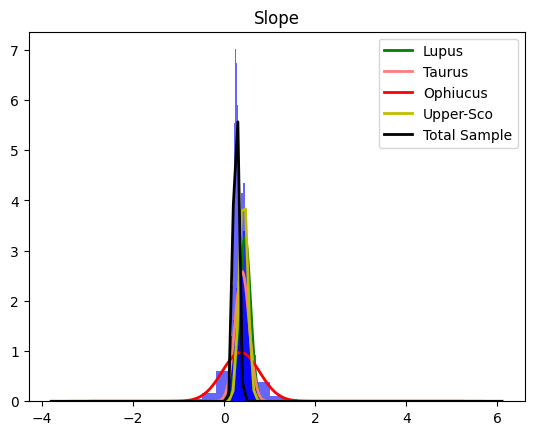

In [16]:
# Plot the histogram.
plt.hist(lupus_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, lupus_data.slope_mu, lupus_data.slope_std)
plt.plot(x, p, 'k', linewidth=2, color="g", label="Lupus")


# Plot the histogram.
plt.hist(taurus_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, taurus_data.slope_mu, taurus_data.slope_std)
plt.plot(x, p, 'k', linewidth=2, label="Taurus", color="salmon")


# Plot the histogram.
plt.hist(ophiucus_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, ophiucus_data.slope_mu, ophiucus_data.slope_std)
plt.plot(x, p, 'k', linewidth=2, label="Ophiucus", color="r")


# Plot the histogram.
plt.hist(upper_sco_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, upper_sco_data.slope_mu, upper_sco_data.slope_std)
plt.plot(x, p, 'k', linewidth=2, label="Upper-Sco", color="y")


# Plot the histogram.
plt.hist(total_sample_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, total_sample_data.slope_mu, total_sample_data.slope_std)
plt.plot(x, p, 'k', linewidth=2, label="Total Sample")


plt.title("Slope")
plt.legend()

/var/folders/35/w3n1r1r17h7553z73jkyb2500000gn/T/ipykernel_49593/2835114649.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, label="Lupus", color="g")
/var/folders/35/w3n1r1r17h7553z73jkyb2500000gn/T/ipykernel_49593/2835114649.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, label="Taurus", color="salmon")
/var/folders/35/w3n1r1r17h7553z73jkyb2500000gn/T/ipykernel_49593/2835114649.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color="r")
/var/folders/35/w3n1r1r17h7553z73jkyb2500000gn/T/ipykernel_49593/

Text(0.5, 1.0, 'Y-Intercept')

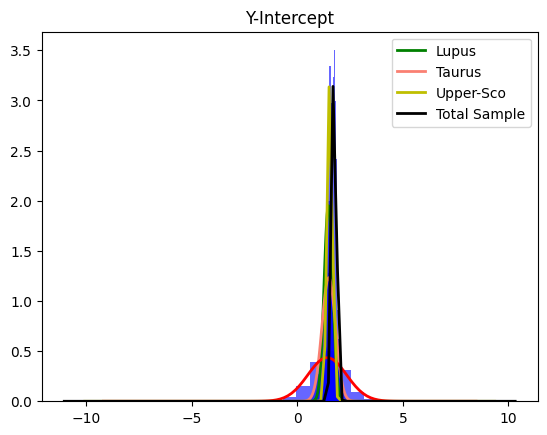

In [17]:
# Plot the histogram.
plt.hist(lupus_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, lupus_data.y_intercept_mu, lupus_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2, label="Lupus", color="g")


# Plot the histogram.
plt.hist(taurus_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, taurus_data.y_intercept_mu, taurus_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2, label="Taurus", color="salmon")


# Plot the histogram.
plt.hist(ophiucus_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, ophiucus_data.y_intercept_mu, ophiucus_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2, color="r")


# Plot the histogram.
plt.hist(upper_sco_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, upper_sco_data.y_intercept_mu, upper_sco_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2, label="Upper-Sco", color="y")


# Plot the histogram.
plt.hist(total_sample_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, total_sample_data.y_intercept_mu, total_sample_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2, label="Total Sample")

plt.legend()
plt.title("Y-Intercept")

In [18]:
#ks test
# assume scatter = 0, calculate spectral_index for upper-sco from function of total sample
# repeat by changing alpha, beta and scatter
# using montecarlo simulation random values for alpha, beta and scatter will be taken
# note that while alpha and beta will be constant for each rune, scatter will not
# I have to randomly assign a spread for the scatter for every run
# for every element calculated in every run, scatter will have to change and be withing the standard deviation

# the run ks 2 sample test on observed vs calculated and store the values

## Take random values from Gaussian

In [19]:
calculated_spectra_indices_upper_sco = []
calculated_spectra_indices_lupus = []

def spectral_index_function(alpha, beta, scatter, x):
    return alpha + beta * x - scatter

beta_list = []
alpha_list = []
def loop_spectra_index(slope_mu, slope_std, y_intercept_mu, y_intercept_std, scatter_mu, scatter_std, flux):
    beta = random.gauss(slope_mu, slope_std)
    beta_list.append(beta)
    alpha = random.gauss(y_intercept_mu, y_intercept_std)
    alpha_list.append(alpha)
    subset = []
    for x in range(len(flux)):
        new_scatter_std = random.gauss(scatter_mu, scatter_std)
        scatter = random.gauss(scatter_mu, scatter_mu - new_scatter_std)
        subset.append(spectral_index_function(alpha, beta, scatter, flux[x]))

    return subset

for i in range(1000):
    calculated_spectra_indices_upper_sco.append(loop_spectra_index(upper_sco_data.slope_mu, upper_sco_data.slope_std,
                                                                   upper_sco_data.y_intercept_mu, upper_sco_data.y_intercept_std,
    upper_sco_data.scatter_mu, upper_sco_data.scatter_std,
    log_flux_barenfeld_0_88mm_updated))

    calculated_spectra_indices_lupus.append(loop_spectra_index(lupus_data.slope_mu, lupus_data.slope_std, lupus_data.y_intercept_mu, lupus_data.y_intercept_std, lupus_scatter_mu, lupus_scatter_std, log_flux_lupus_1_mm))

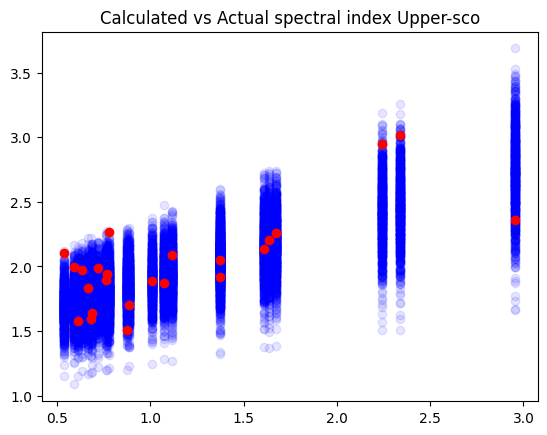

Mean ks test on calculated vs measure spectral index for upper-sco from upper-sco mc simulation:  0.2464632986368656


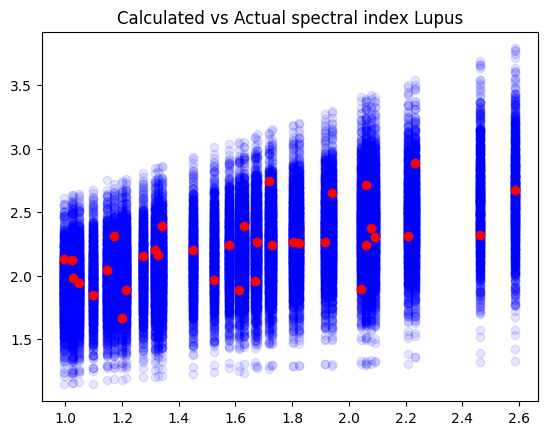

In [20]:
ks_2sample_upper_sco = []
for i in range(len(calculated_spectra_indices_upper_sco)):
    ks_2sample_upper_sco.append(ks_2samp(spectral_index_upper_sco, calculated_spectra_indices_upper_sco[i])[1])
    plt.scatter(log_flux_barenfeld_0_88mm_updated, calculated_spectra_indices_upper_sco[i], alpha=0.1, c="b")

plt.scatter(log_flux_barenfeld_0_88mm_updated, spectral_index_upper_sco, c='r')
plt.title("Calculated vs Actual spectral index Upper-sco")
plt.show()
print("Mean ks test on calculated vs measure spectral index for upper-sco from upper-sco mc simulation: ", np.mean(ks_2sample_upper_sco))


for i in range(len(calculated_spectra_indices_lupus)):
    plt.scatter(log_flux_lupus_1_mm, calculated_spectra_indices_lupus[i], alpha=0.1, c="b")

plt.scatter(log_flux_lupus_1_mm, tazzari_lupus_spectral_indices, c='r')
plt.title("Calculated vs Actual spectral index Lupus")
plt.show()

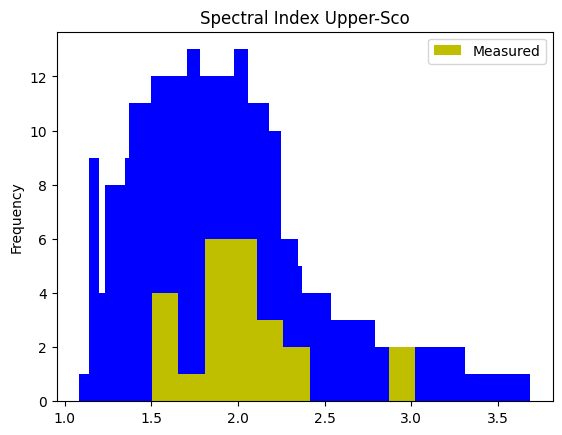

In [21]:
for i in range(len(calculated_spectra_indices_upper_sco)):
    mu_calculated, std_calculated = norm.fit(calculated_spectra_indices_upper_sco[i])

    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu_calculated, std_calculated)
    plt.hist(calculated_spectra_indices_upper_sco[i], color='b')

plt.hist(spectral_index_upper_sco, color='y', label='Measured')

plt.title("Spectral Index Upper-Sco")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Text(0, 0.5, '$\\alpha$')

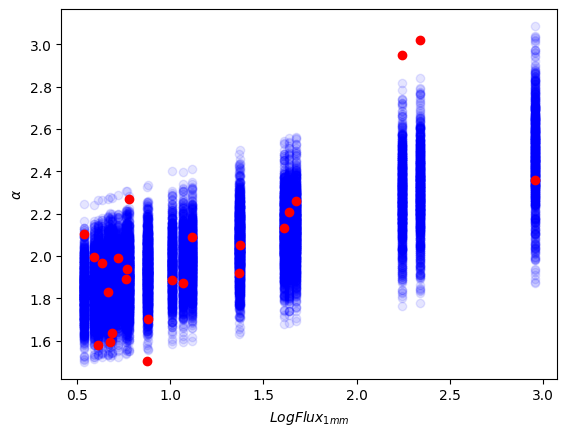

In [22]:
calculated_spectral_index_upper_sco_from_total_sample = []

for i in range(1000):
    calculated_spectral_index_upper_sco_from_total_sample.append(loop_spectra_index(total_sample_data.slope_mu, total_sample_data.slope_std, total_sample_data.y_intercept_mu, total_sample_data.y_intercept_std,
    total_sample_data.scatter_mu, total_sample_data.scatter_std, log_flux_barenfeld_0_88mm_updated))

for i in range(len(calculated_spectral_index_upper_sco_from_total_sample)):
    plt.scatter(log_flux_barenfeld_0_88mm_updated, calculated_spectral_index_upper_sco_from_total_sample[i], alpha=0.1, c="b")

plt.scatter(log_flux_barenfeld_0_88mm_updated, spectral_index_upper_sco, c='r')
plt.xlabel("$Log Flux_{1mm}$")
plt.ylabel(r"$\alpha$")

#### Mean of ks_2sample between real upper-sco spectral indices and calculated upper-sco spectral index values from the Monte-Carlo simulation for total sample

In [23]:
matching_upper_sco_real_vs_from_total_sample = []
statistics_matching_upper_sco_real_vs_from_total_sample = []
for i in range(len(calculated_spectral_index_upper_sco_from_total_sample)):
    matching_upper_sco_real_vs_from_total_sample.append(ks_2samp(calculated_spectral_index_upper_sco_from_total_sample[i], spectral_index_upper_sco)[1])
    statistics_matching_upper_sco_real_vs_from_total_sample.append(ks_2samp(calculated_spectral_index_upper_sco_from_total_sample[i], spectral_index_upper_sco)[0])

print("Mean ks test on calculated vs measure spectral index for upper-sco from total sample mc simulation: ", np.mean(matching_upper_sco_real_vs_from_total_sample))

Mean ks test on calculated vs measure spectral index for upper-sco from total sample mc simulation:  0.20097187354082416


[11.0, 15.0, 10.0, 7.0, 7.0, 7.0, 14.0, 10.0, 6.0, 11.0, 11.0, 13.0, 6.0, 7.0, 6.0, 14.0, 14.0, 6.0, 13.0, 12.0, 11.0, 11.0, 7.0, 12.0, 11.0, 12.0, 9.0, 8.0, 10.0, 7.0, 8.0, 10.0, 10.0, 10.0, 14.0, 5.0, 6.0, 9.0, 16.0, 13.0, 6.0, 11.0, 9.0, 7.0, 13.0, 14.0, 9.0, 13.0, 6.0, 6.0, 6.0, 6.0, 5.0, 7.0, 12.0, 9.0, 11.0, 6.0, 6.0, 7.0, 11.0, 6.0, 8.0, 6.0, 6.0, 6.0, 11.0, 5.0, 6.0, 5.0, 10.0, 10.0, 12.0, 15.0, 10.0, 6.0, 7.0, 11.0, 10.0, 5.0, 5.0, 12.0, 14.0, 9.0, 8.0, 14.0, 7.0, 10.0, 13.0, 5.0, 5.0, 6.0, 5.0, 12.0, 5.0, 11.0, 5.0, 12.0, 8.0, 11.0, 15.0, 11.0, 8.0, 11.0, 7.0, 6.0, 13.0, 14.0, 9.0, 8.0, 9.0, 6.0, 19.0, 9.0, 7.0, 11.0, 12.0, 7.0, 7.0, 15.0, 12.0, 15.0, 13.0, 8.0, 10.0, 11.0, 8.0, 8.0, 5.0, 9.0, 6.0, 6.0, 7.0, 5.0, 7.0, 6.0, 5.0, 6.0, 6.0, 13.0, 13.0, 15.0, 7.0, 7.0, 5.0, 9.0, 8.0, 10.0, 5.0, 6.0, 14.0, 15.0, 6.0, 6.0, 7.0, 10.0, 12.0, 6.0, 9.0, 8.0, 10.0, 11.0, 6.0, 7.0, 7.0, 13.0, 12.0, 5.0, 9.0, 5.0, 6.0, 8.0, 14.0, 8.0, 6.0, 11.0, 6.0, 7.0, 12.0, 17.0, 8.0, 8.0, 9.0, 13.0, 

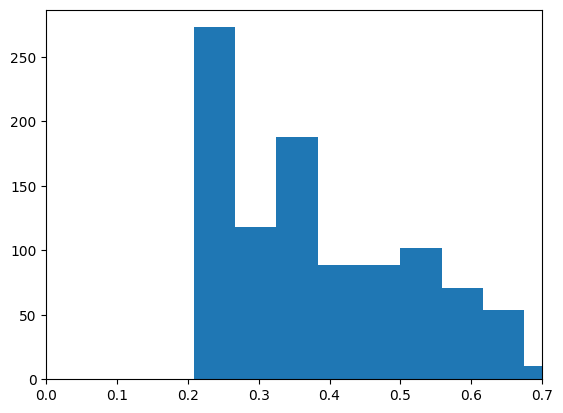

In [24]:
plt.hist(statistics_matching_upper_sco_real_vs_from_total_sample, bins=10)
plt.xlim(0,0.7)
statistics_matching_upper_sco_real_vs_from_total_sample = [x*24 for x in statistics_matching_upper_sco_real_vs_from_total_sample]
print(statistics_matching_upper_sco_real_vs_from_total_sample)
print(min(statistics_matching_upper_sco_real_vs_from_total_sample))

#### Mean of ks_2sample between real upper-sco spectral indices and calculated upper-sco spectral index values from the Monte-Carlo simulation for upper-sco sample

In [25]:
print(np.mean(ks_2sample_upper_sco))

0.2464632986368656


In [26]:
print(np.mean(matching_upper_sco_real_vs_from_total_sample)/np.mean(ks_2sample_upper_sco))

0.8154231264953259


In [27]:
print(max(matching_upper_sco_real_vs_from_total_sample))
print(min(matching_upper_sco_real_vs_from_total_sample))

0.686017125117228
1.0619728627447544e-07


In [28]:
print(np.median(matching_upper_sco_real_vs_from_total_sample))
print(np.median(ks_2sample_upper_sco))

0.06780335175136987
0.13982257948893737


In [29]:
print(matching_upper_sco_real_vs_from_total_sample, '\n ________________________')

[0.011965431606262756, 0.00010401434205661125, 0.029913567122680163, 0.26283384201555077, 0.26283384201555077, 0.26283384201555077, 0.0004056559340207839, 0.029913567122680163, 0.4490368220409109, 0.011965431606262756, 0.011965431606262756, 0.0014013568629808897, 0.4490368220409109, 0.26283384201555077, 0.4490368220409109, 0.0004056559340207839, 0.0004056559340207839, 0.4490368220409109, 0.0014013568629808897, 0.00432085032746239, 0.011965431606262756, 0.011965431606262756, 0.26283384201555077, 0.00432085032746239, 0.011965431606262756, 0.00432085032746239, 0.06780335175136987, 0.13982257948893737, 0.029913567122680163, 0.26283384201555077, 0.13982257948893737, 0.029913567122680163, 0.029913567122680163, 0.029913567122680163, 0.0004056559340207839, 0.686017125117228, 0.4490368220409109, 0.06780335175136987, 2.340322696273753e-05, 0.0014013568629808897, 0.4490368220409109, 0.011965431606262756, 0.06780335175136987, 0.26283384201555077, 0.0014013568629808897, 0.0004056559340207839, 0.067

In [30]:
print(calculated_spectral_index_upper_sco_from_total_sample[0], '\n',
      calculated_spectral_index_upper_sco_from_total_sample[2], '\n',
      calculated_spectral_index_upper_sco_from_total_sample[4], '\n',
      spectral_index_upper_sco)

[2.013057194360644, 2.0114635229059923, 2.3846545098332648, 1.9657350593751035, 1.9578405625441624, 2.0030029377486804, 2.0670281279975837, 1.9748149394650518, 2.3773690840012436, 2.0500831117685374, 1.9733300249773147, 2.103011728290018, 2.151667015313336, 2.196774736831973, 2.2249439401737954, 2.0002405818182303, 2.530654058392426, 2.026250456038024, 2.0605293411811076, 1.9937072726380058, 2.2089681225970725, 2.0772617233990642, 2.14159466113848, 1.9983441366427321] 
 [1.7632553046235986, 1.7648200292315235, 2.1810309469501146, 1.7087218850589272, 1.708479480953585, 1.7734192457980515, 1.8313257009538155, 1.7232279212853385, 2.203218047183915, 1.7968405146891755, 1.7177635215627567, 1.861353771422678, 1.9283282917397706, 2.0136140758892194, 1.9776508150454988, 1.7406772853763466, 2.3969281131658375, 1.7649058318074766, 1.7939973456345237, 1.7292205751462264, 1.9994062615748842, 1.8481379875866693, 1.9381170266082695, 1.7226748610790752] 
 [1.856128627017343, 1.828021251140788, 2.2338

In [31]:
print(alpha_list, '\n __________________________________ \n', beta_list)

[1.7088324677839675, 1.759764090388431, 1.6466307033527763, 1.4992734126035563, 1.3639585079854437, 1.9124454488939573, 1.3522651497237261, 1.5028792063949095, 1.492698309071418, 0.8446366687690797, 1.2605912040945957, 1.6963868765104322, 1.768767643008784, 1.2453820113341063, 1.287882653700223, 1.7281328919371322, 1.6481518004822422, 1.3116685163062838, 1.7195000388324226, 1.286123720020692, 1.6426287403418272, 1.5280609996320993, 1.5223669058855256, 1.5350199207174697, 1.3915702409791908, 1.5443385160052814, 1.5893504584499771, 1.6053376676386817, 1.4137748717832659, 1.241042905716782, 1.7095720482341676, 1.5853476825159534, 1.488768409093549, 1.5064833445742134, 1.5103298073275526, 1.716990051150249, 1.6690755651045628, 1.5375556517374627, 1.4992584391925832, 1.4068546419110466, 1.497050119234188, 1.622139603219037, 1.5096361023191396, 1.6573159241140412, 1.580724833224364, 1.6450753292493803, 1.4626065327964026, 1.4695840617043114, 1.4571924178164413, 1.6046164929265234, 1.63926532

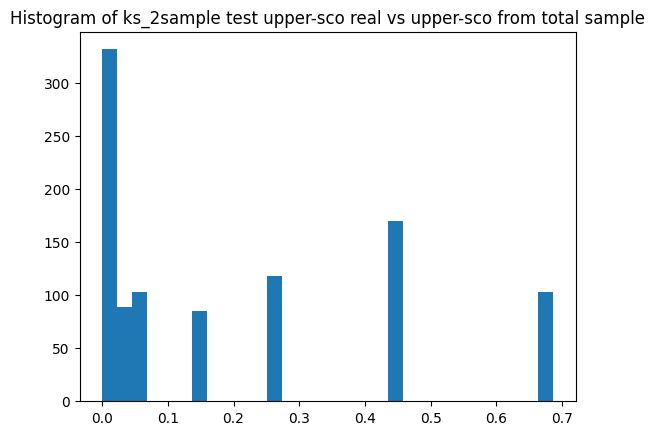

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.2343109, -0.1343109, -0.0343109,  0.0656891,  0.1656891,
         0.2656891,  0.3656891,  0.4656891,  0.5656891,  0.6656891,
         0.7656891]),
 <BarContainer object of 10 artists>)

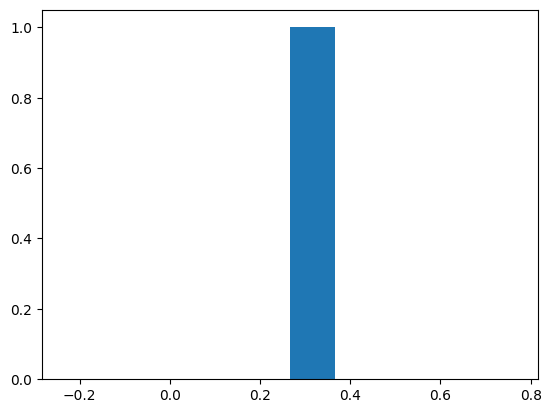

In [32]:
plt.hist(matching_upper_sco_real_vs_from_total_sample, bins=30)
plt.title('Histogram of ks_2sample test upper-sco real vs upper-sco from total sample')
plt.savefig('Histogram of ks_2sample test upper-sco real vs upper-sco from total sample')
plt.show()
plt.hist(total_sample_data.slope_mu)

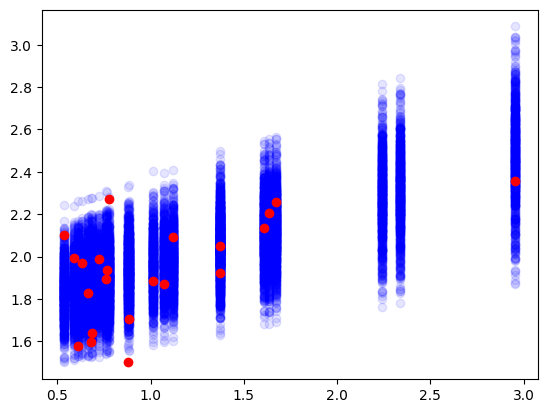

In [33]:
less_than_2_5_spectral_index_upper_sco = []
less_than_2_5_flux_upper_sco = []
for i in spectral_index_upper_sco:
    if i <= 2.5:
        less_than_2_5_spectral_index_upper_sco.append(i)
        less_than_2_5_flux_upper_sco.append(log_flux_barenfeld_0_88mm_updated[spectral_index_upper_sco.index(i)])

plt.scatter(less_than_2_5_flux_upper_sco, less_than_2_5_spectral_index_upper_sco, c='r', zorder=1)
for i in range(len(calculated_spectral_index_upper_sco_from_total_sample)):
    plt.scatter(log_flux_barenfeld_0_88mm_updated, calculated_spectral_index_upper_sco_from_total_sample[i], alpha=0.1, c="b", zorder=0)


In [34]:
less_than_2_5_index_upper_sco = region_data()

In [35]:
lm = linmix.LinMix(less_than_2_5_flux_upper_sco, less_than_2_5_spectral_index_upper_sco, xsig[:len(less_than_2_5_flux_upper_sco)], ysig[:len(less_than_2_5_flux_upper_sco)], K=2)
lm.run_mcmc(silent=True)

less_than_2_5_index_upper_sco = region_data()

xmin = 0
xmax = 800
xs = np.arange(xmin,xmax)
less_than_2_5_index_upper_sco.slope = []
less_than_2_5_index_upper_sco.y_intercept = []
less_than_2_5_index_upper_sco.scatter = []
for i in range(0, 10000):
    ys = lm.chain[i]['alpha'] + xs * lm.chain[i]['beta']
    less_than_2_5_index_upper_sco.slope.append(lm.chain[i]['beta'])
    less_than_2_5_index_upper_sco.y_intercept.append(lm.chain[i]['alpha'])
    less_than_2_5_index_upper_sco.scatter.append(lm.chain[i]['sigsqr'])

In [36]:
less_than_2_5_index_calculated_spectra_indices_upper_sco = []
less_than_2_5_index_upper_sco.slope_mu, less_than_2_5_index_upper_sco.slope_std = norm.fit(less_than_2_5_index_upper_sco.slope)
less_than_2_5_index_upper_sco.y_intercept_mu, less_than_2_5_index_upper_sco.y_intercept_std = norm.fit(less_than_2_5_index_upper_sco.y_intercept)
less_than_2_5_index_upper_sco.scatter_mu, less_than_2_5_index_upper_sco.scatter_std = norm.fit(less_than_2_5_index_upper_sco.scatter)

In [37]:
for i in range(1000):
    less_than_2_5_index_calculated_spectra_indices_upper_sco.append(loop_spectra_index(less_than_2_5_index_upper_sco.slope_mu, less_than_2_5_index_upper_sco.slope_std,
                                                                   less_than_2_5_index_upper_sco.y_intercept_mu, less_than_2_5_index_upper_sco.y_intercept_std,
    less_than_2_5_index_upper_sco.scatter_mu, less_than_2_5_index_upper_sco.scatter_std,
    less_than_2_5_flux_upper_sco))

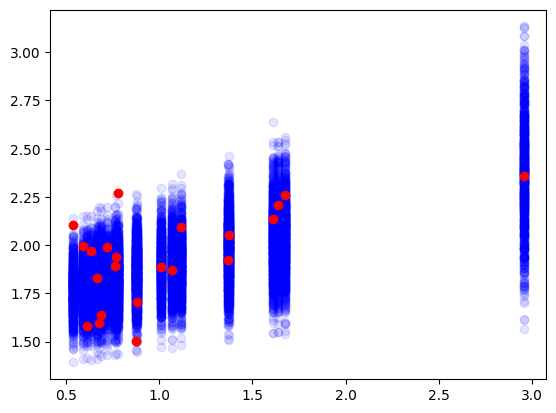

In [38]:
ks_2sample_less_than_2_5_upper_sco = []
for i in range(len(calculated_spectra_indices_upper_sco)):
    ks_2sample_less_than_2_5_upper_sco.append(ks_2samp(less_than_2_5_spectral_index_upper_sco, less_than_2_5_index_calculated_spectra_indices_upper_sco[i])[1])
    plt.scatter(less_than_2_5_flux_upper_sco, less_than_2_5_index_calculated_spectra_indices_upper_sco[i], alpha=0.1, c="b")

plt.scatter(less_than_2_5_flux_upper_sco, less_than_2_5_spectral_index_upper_sco, color='r')


In [39]:
np.mean(ks_2sample_less_than_2_5_upper_sco)

0.17704234287391904

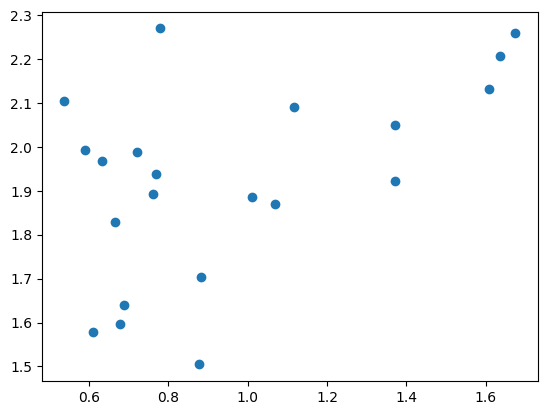

In [40]:
less_than_2_flux_upper_sco = region_data()
less_than_2_flux_upper_sco.index = []
less_than_2_flux_upper_sco.flux = []

for i in log_flux_barenfeld_0_88mm_updated:
    if i < 2.0:
        less_than_2_flux_upper_sco.flux.append(i)
        less_than_2_flux_upper_sco.index.append(spectral_index_upper_sco[log_flux_barenfeld_0_88mm_updated.index(i)])

plt.scatter(less_than_2_flux_upper_sco.flux, less_than_2_flux_upper_sco.index)


In [41]:
lm = linmix.LinMix(less_than_2_flux_upper_sco.flux, less_than_2_flux_upper_sco.index, xsig[:len(less_than_2_flux_upper_sco.flux)], ysig[:len(less_than_2_flux_upper_sco.flux)], K=2)
lm.run_mcmc(silent=True)

xmin = 0
xmax = 800
xs = np.arange(xmin,xmax)
less_than_2_flux_upper_sco.slope = []
less_than_2_flux_upper_sco.y_intercept = []
less_than_2_flux_upper_sco.scatter = []
for i in range(0, 10000):
    ys = lm.chain[i]['alpha'] + xs * lm.chain[i]['beta']
    less_than_2_flux_upper_sco.slope.append(lm.chain[i]['beta'])
    less_than_2_flux_upper_sco.y_intercept.append(lm.chain[i]['alpha'])
    less_than_2_flux_upper_sco.scatter.append(lm.chain[i]['sigsqr'])

In [42]:
less_than_2_flux_calculated_spectra_indices_upper_sco = []
less_than_2_flux_upper_sco.slope_mu, less_than_2_flux_upper_sco.slope_std = norm.fit(less_than_2_flux_upper_sco.slope)
less_than_2_flux_upper_sco.y_intercept_mu, less_than_2_flux_upper_sco.y_intercept_std = norm.fit(less_than_2_flux_upper_sco.y_intercept)
less_than_2_flux_upper_sco.scatter_mu, less_than_2_flux_upper_sco.scatter_std = norm.fit(less_than_2_flux_upper_sco.scatter)

In [43]:
for i in range(1000):
    less_than_2_flux_calculated_spectra_indices_upper_sco.append(loop_spectra_index(less_than_2_flux_upper_sco.slope_mu, less_than_2_flux_upper_sco.slope_std,
                                                                   less_than_2_flux_upper_sco.y_intercept_mu, less_than_2_flux_upper_sco.y_intercept_std,
    less_than_2_flux_upper_sco.scatter_mu, less_than_2_flux_upper_sco.scatter_std,
    less_than_2_flux_upper_sco.flux))

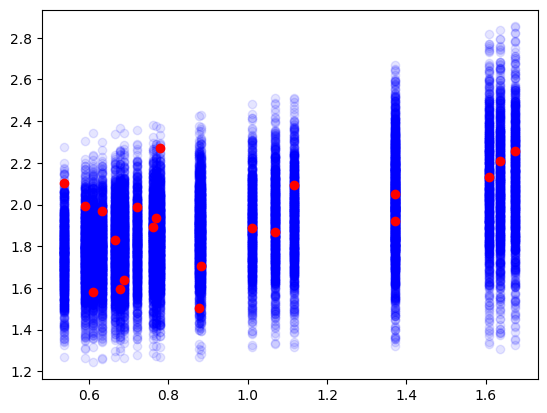

In [44]:
ks_2sample_less_than_2_flux_upper_sco = []
for i in range(len(calculated_spectra_indices_upper_sco)):
    ks_2sample_less_than_2_flux_upper_sco.append(ks_2samp(less_than_2_flux_upper_sco.index, less_than_2_flux_calculated_spectra_indices_upper_sco[i])[1])
    plt.scatter(less_than_2_flux_upper_sco.flux, less_than_2_flux_calculated_spectra_indices_upper_sco[i], alpha=0.1, c="b")

plt.scatter(less_than_2_flux_upper_sco.flux, less_than_2_flux_upper_sco.index, color='r')


In [45]:
print(np.mean(ks_2sample_less_than_2_flux_upper_sco))

0.14887511821763139
